<a href="https://colab.research.google.com/github/TanakaSeiju/EU_M_Math-Repository/blob/main/Chapter9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Variatinal Bayesian Gaussion Mixture
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3

'%.3f'

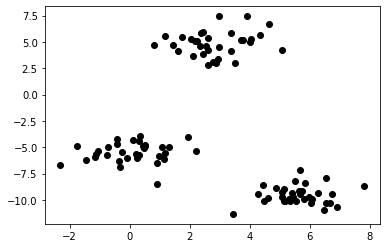

In [13]:
#9-2-2
# k-means法を使うためのインポート
from sklearn.cluster import KMeans

# データ取得のためのインポート
from sklearn.datasets import make_blobs

# サンプルデータ生成
# 注意：make_blobsは2つの値を返すため、一方は使用しない「 _ 」で受け取る
X, _ = make_blobs(random_state=10)

# グラフを描画
# colorのオプションで色付けができる
plt.scatter(X[:,0],X[:,1],color='black')

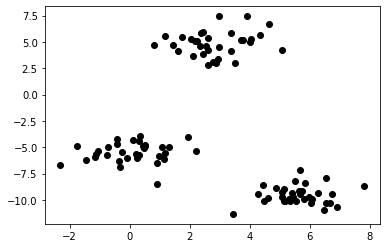

In [14]:
Kmeans = KMeans(init = "random", n_clusters = 3)

Kmeans.fit(X)

y_pred = Kmeans.predict(X)

plt.scatter(X[:,0],X[:,1],color='black')

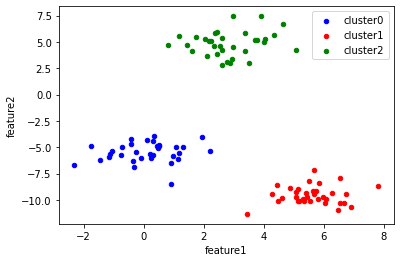

In [15]:
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis = 1)

merge_data.columns = ["feature1", "feature2", "cluster"]

ax = None
colors = ["blue", "red", "green"]
for i, data, in merge_data.groupby("cluster"):
  ax = data.plot.scatter(x = "feature1", y = "feature2", color = colors[i],
                         label = f"cluster{i}", ax = ax)

Text(0, 0.5, 'Distortion')

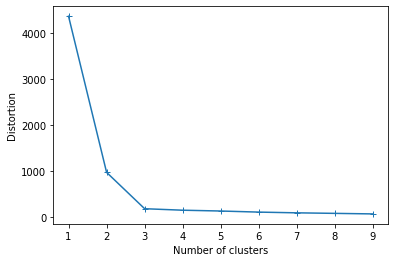

In [ ]:
# 9-2-4
dist_list = []
for i in range(1, 10):
  kmeans = KMeans(n_clusters = i, init = "random", random_state = 0)
  kmeans.fit(X)
  dist_list.append(kmeans.inertia_)

plt.plot(range(1,10), dist_list, marker = "+")
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")

In [ ]:
from sklearn.preprocessing import StandardScaler
import requests, zipfile
import io

zip_file_ur1 = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

r = requests.get(zip_file_ur1, stream = True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

bank = pd.read_csv("bank-full.csv", sep = ";")

bank.head()

# データの列の絞り込み
bank_sub = bank[['age','balance','campaign','previous']]

# 標準化
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)

Text(0, 0.5, 'Distortion')

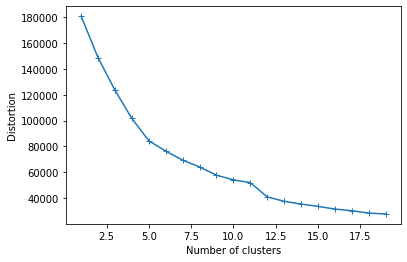

In [ ]:
dist_list = []
for i in range(1, 20):
  kmeans = KMeans(n_clusters = i, init = "random", random_state = 0)
  kmeans.fit(bank_sub_std)
  dist_list.append(kmeans.inertia_)
  
plt.plot(range(1,20), dist_list, marker = "+")
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")

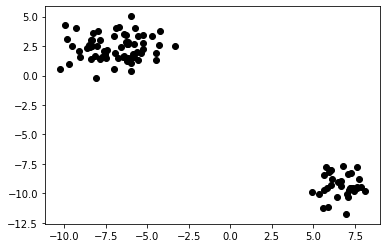

In [ ]:
#Chap09_Ex-01
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 52)

plt.scatter(X[:,0],X[:,1],color='black')

相関係数0.889:


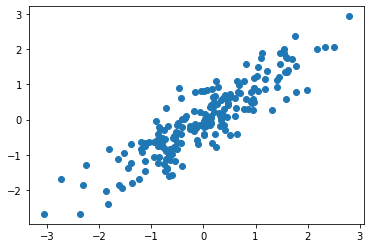

In [ ]:
# 9-3-1
from sklearn.preprocessing import StandardScaler

sample = np.random.RandomState(1)

X = np.dot(sample.rand(2, 2), sample.randn(2, 200)).T

sc = StandardScaler()
X_std = sc.fit_transform(X)

print("相関係数{:.3f}:".format(sp.stats.pearsonr(X_std[:, 0], X_std[:, 1])[0]))
plt.scatter(X_std[:, 0], X_std[:, 1])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(X_std)

PCA(n_components=2)

In [ ]:
print(pca.components_)

[[-0.707 -0.707]
 [-0.707  0.707]]


In [ ]:
print("各主成分の分散:{}".format(pca.explained_variance_))

各主成分の分散:[1.899 0.111]


In [ ]:
print("各主成分の分散割合:{}".format(pca.explained_variance_ratio_))

各主成分の分散割合:[0.945 0.055]


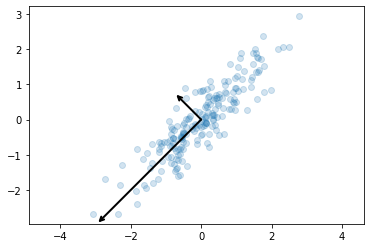

In [ ]:
arrowprops = dict(arrowstyle = "->", linewidth = 2, shrinkA = 0, shrinkB = 0)

def draw_vector(v0, v1):
  plt.gca().annotate("", v1, v0, arrowprops = arrowprops)

plt.scatter(X_std[:, 0], X_std[:, 1], alpha = 0.2)

for length, vector in zip(pca.explained_variance_, pca.components_):
  v = vector * 3 * np.sqrt(length)
  draw_vector(pca.mean_, pca.mean_ + v)

plt.axis("equal");

In [24]:
#Chap09_Ex-02
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = load_iris()

sc = StandardScaler()
sc.fit(X.data)
X_std = sc.transform(X.data)

pca = PCA(n_components = 2)
a = pca.fit(X_std)
X_pca = pca.transform(X_std)

print("各主成分:{}".format(X_pca.shape))

各主成分:(150, 2)


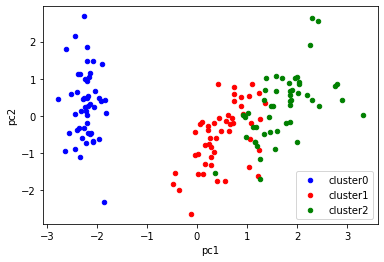

In [22]:
merge_data = pd.concat([pd.DataFrame(X_pca[:,0]), pd.DataFrame(X_pca[:,1]), pd.DataFrame(X.target)], axis = 1)

merge_data.columns = ["pc1", "pc2", "iris.target"]

ax = None
colors = ["blue", "red", "green"]
for i, data, in merge_data.groupby("iris.target"):
  ax = data.plot.scatter(x = "pc1", y = "pc2", color = colors[i],
                         label = f"cluster{i}", ax = ax)